## Time series

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings("ignore")
from keras.layers.core import Dense, Activation, Dropout
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

In [113]:
from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, LSTM

In [27]:
# # Step 1: Data Collection
# data = pd.read_csv('Data_2000-23.csv')

# # Step 2: Data Preparation
# data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
# data = data.set_index('time')
# data = data.resample('D').size() # Resample data to daily frequency
#data.head()

In [26]:

# # Plot the time series
# plt.plot(data['mag'])
# plt.xlabel('Time')
# plt.ylabel('Magnitude')
# plt.show()

# # Test for stationarity using the ADF test
# result = adfuller(data['mag'])
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])

# # Plot the ACF and PACF to choose the ARIMA parameters
# plot_acf(data['mag'], lags=50)
# plot_pacf(data['mag'], lags=50)
# plt.show()

# # Difference the time series to make it stationary
# diff = data['mag'].diff().dropna()

# # Plot the differenced time series
# plt.plot(diff)
# plt.xlabel('Time')
# plt.ylabel('Magnitude Difference')
# plt.show()

# # Test for stationarity again using the ADF test
# result = adfuller(diff)
# print('ADF Statistic: %f' % result[0])
# #print('p-value: %


In [28]:

# # Step 3: Data Exploration
# plt.plot(data)
# plt.title('Earthquake Frequency')
# plt.xlabel('Time')
# plt.ylabel('Number of Earthquakes')
# plt.show()

# # Step 4: Model Selection
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plot_acf(data)
# plot_pacf(data)
# plt.show()

# # Based on the ACF and PACF plots, we select an ARIMA(1,1,0) model
# model = ARIMA(data, order=(1,1,0))
# model_fit = model.fit()

# # Step 6: Model Validation
# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# plt.show()

# residuals.plot(kind='kde')
# plt.show()

# print(residuals.describe())

# # Step 7: Forecasting
# forecast = model_fit.forecast(steps=30) # Forecast the next 30 days
# forecast = pd.Series(forecast, index=pd.date_range(start='2023-03-28', periods=30, freq='D'))
# plt.plot(data)
# plt.plot(forecast)
# plt.title('Earthquake Frequency Forecast')
# plt.xlabel('Time')
# plt.ylabel('Number of Earthquakes')
# plt.legend(['Actual', 'Forecast'])
# plt.show()

In [98]:
df_time = pd.read_csv('US_data.csv', index_col='Date',parse_dates=True)

# preprocess data
df_time = pd.DataFrame(df_time.groupby(['Date'])['Time'].count())
df_time = df_time.rename(columns={'Time':'Count'})
df_time = df_time.resample('D').sum() # resample to daily frequency
df_time.head()

,Count
Date,
2000-01-01,9
2000-01-02,6
2000-01-03,12
2000-01-04,6
2000-01-05,9


In [99]:
train = df_time[df_time.index < '2020-01-01']
test = df_time[df_time.index >= '2020-01-01']

In [100]:
df_time.index.min(), df_time.index.max()

(Timestamp('2000-01-01 00:00:00', freq='D'),
 Timestamp('2023-02-27 00:00:00', freq='D'))

In [101]:

result = adfuller(df_time['Count'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -20.840028
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


ARIMA(0, 0, 0) ,  RMSE=11.884


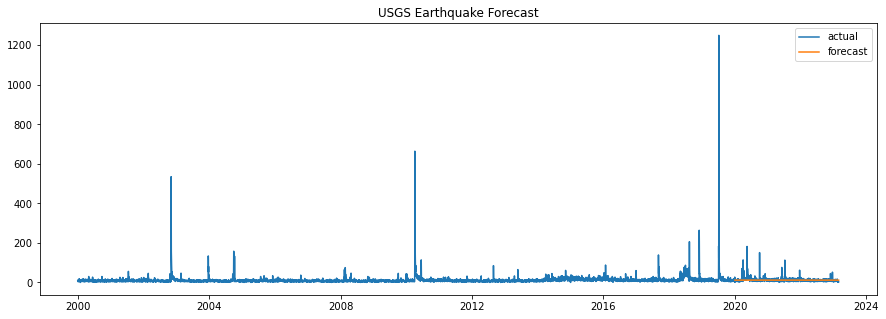

ARIMA(0, 0, 1) ,  RMSE=11.885


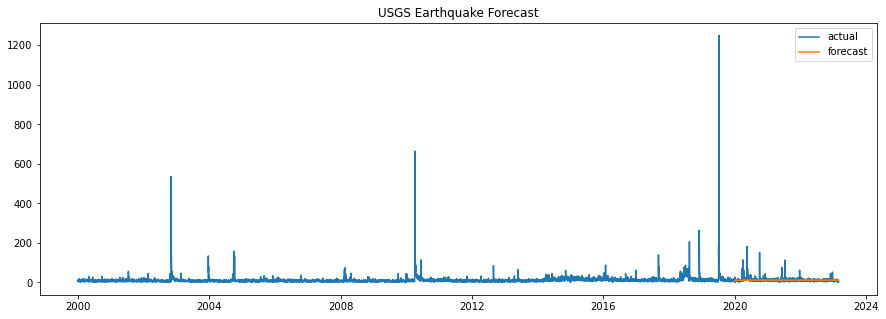

ARIMA(0, 0, 2) ,  RMSE=11.883


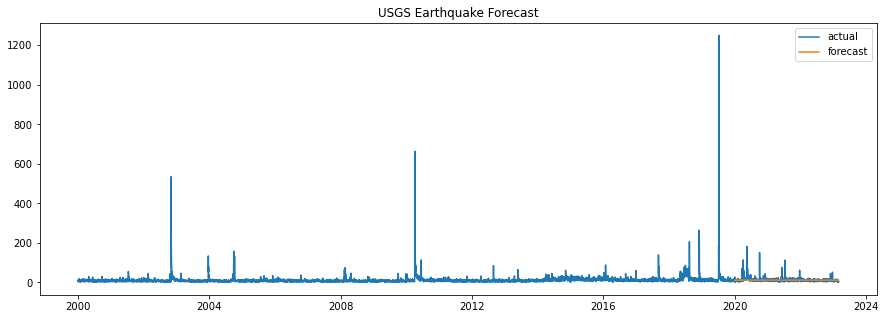

ARIMA(0, 1, 0) ,  RMSE=17.148


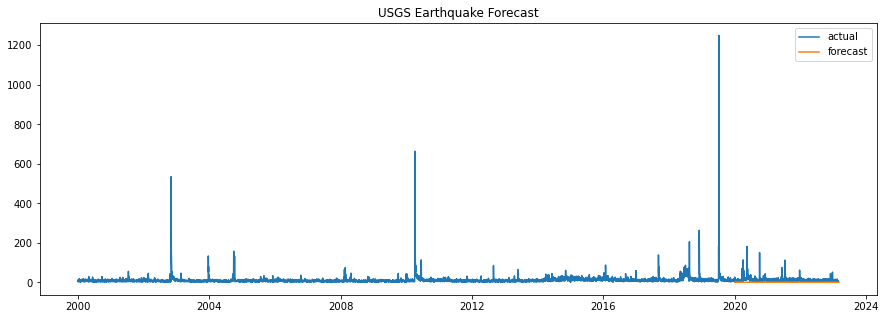

ARIMA(0, 1, 1) ,  RMSE=12.161


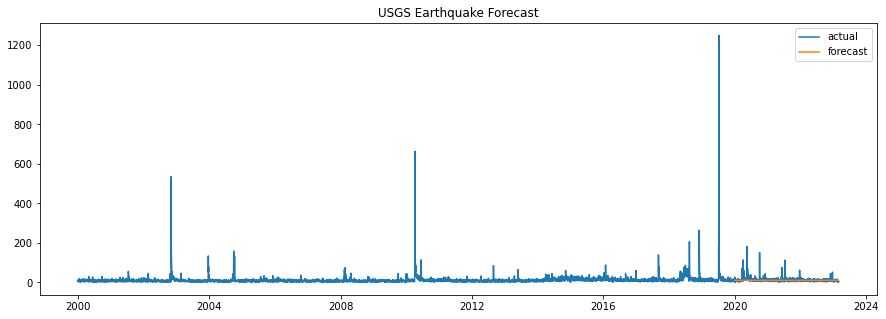

ARIMA(0, 1, 2) ,  RMSE=12.135


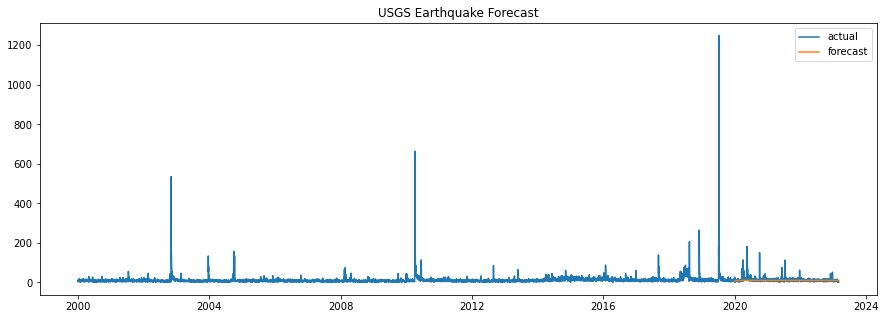

ARIMA(0, 2, 0) ,  RMSE=17343.762


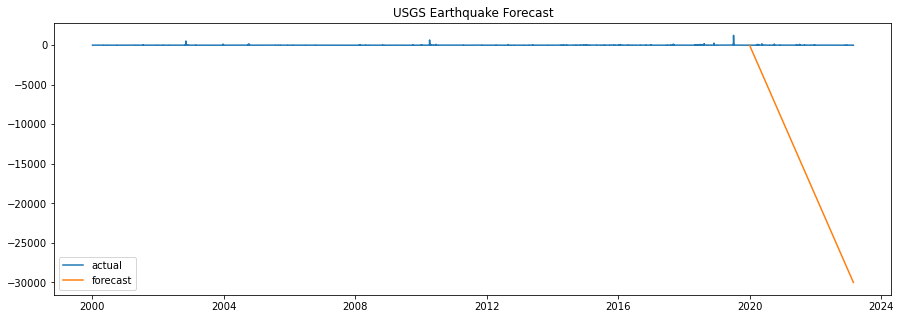

ARIMA(0, 2, 1) ,  RMSE=17.888


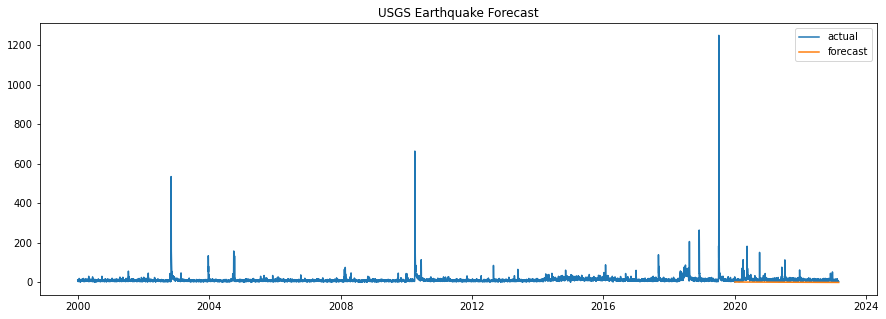

ARIMA(0, 2, 2) ,  RMSE=12.145


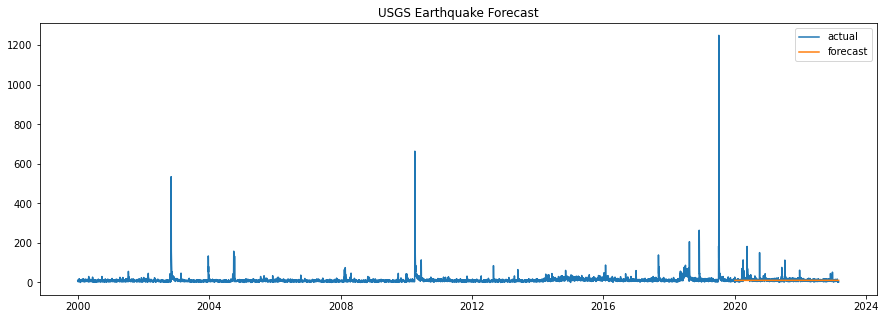

ARIMA(1, 0, 0) ,  RMSE=11.884


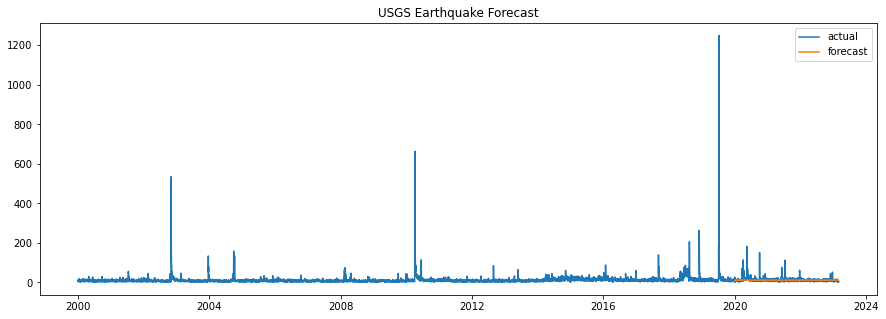

ARIMA(1, 0, 1) ,  RMSE=11.883


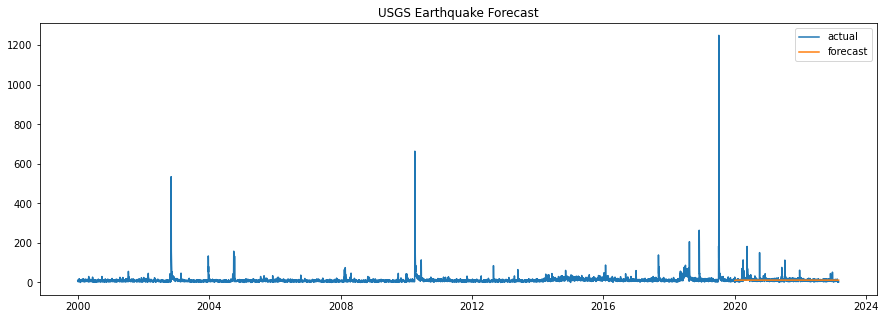

ARIMA(1, 0, 2) ,  RMSE=11.883


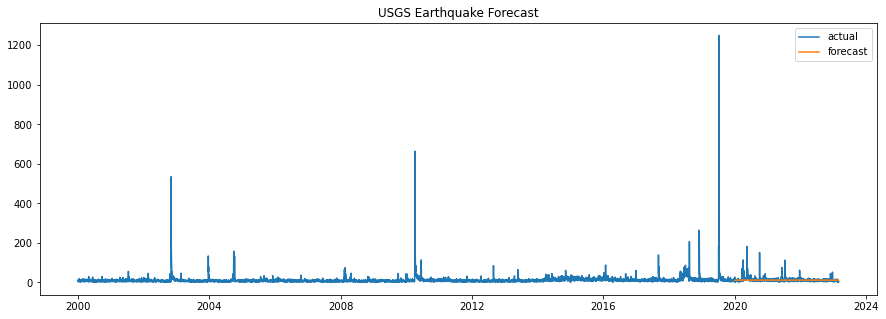

ARIMA(1, 1, 0) ,  RMSE=12.780


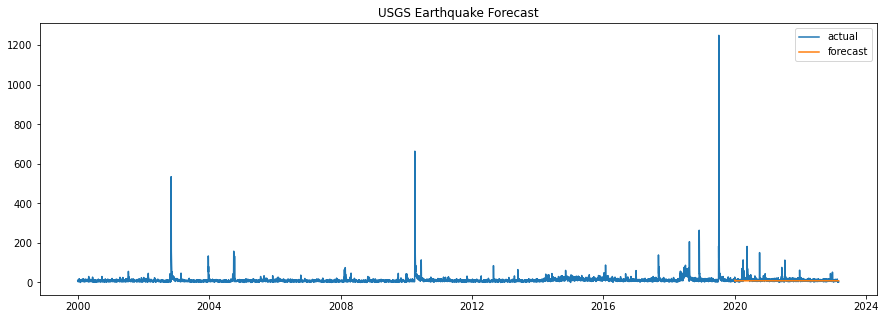

ARIMA(1, 1, 1) ,  RMSE=12.068


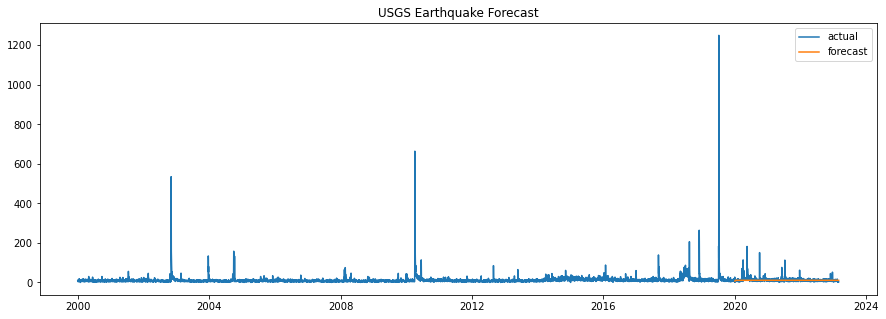

ARIMA(1, 1, 2) ,  RMSE=12.476


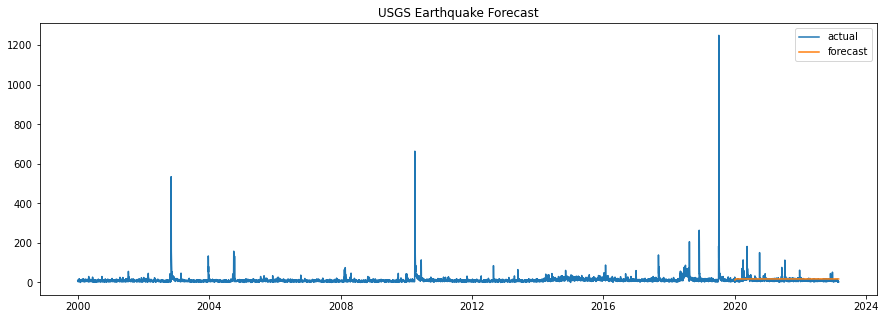

ARIMA(1, 2, 0) ,  RMSE=6115.451


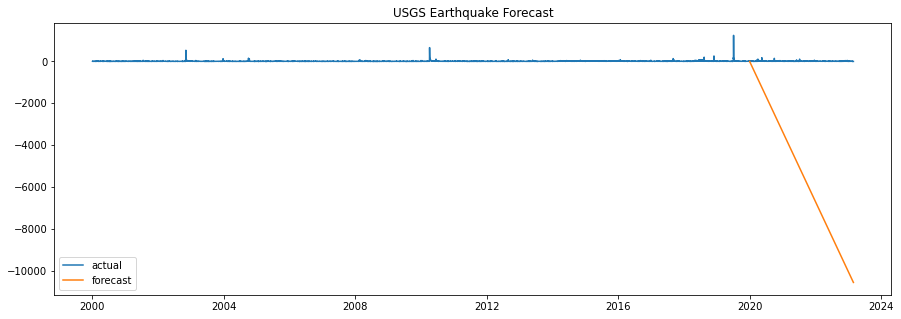

ARIMA(1, 2, 1) ,  RMSE=12.773


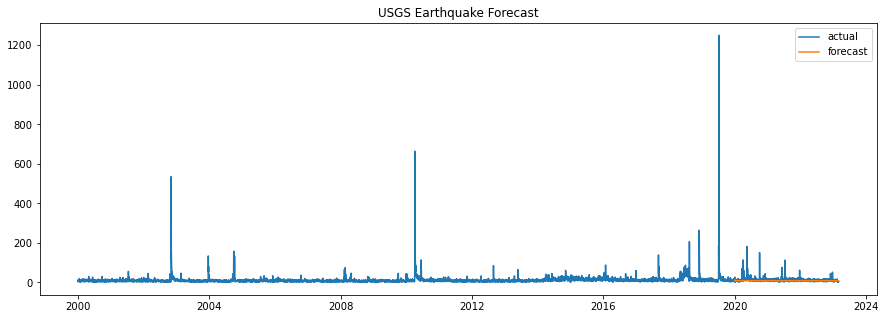

ARIMA(1, 2, 2) ,  RMSE=12.977


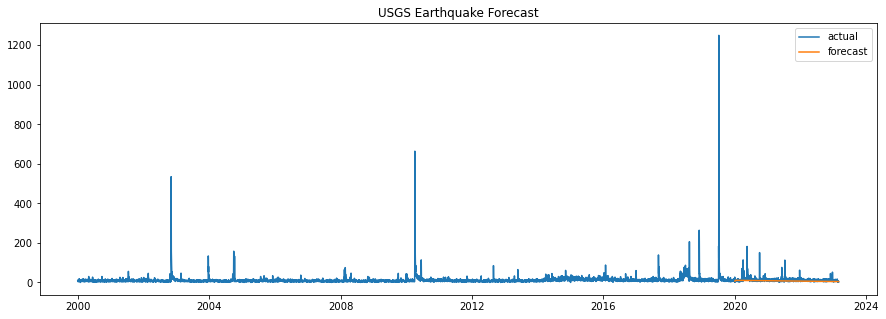

ARIMA(2, 0, 0) ,  RMSE=11.883


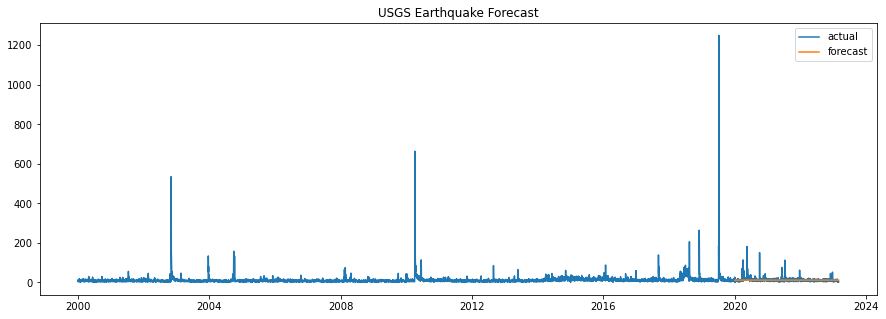

ARIMA(2, 0, 1) ,  RMSE=11.883


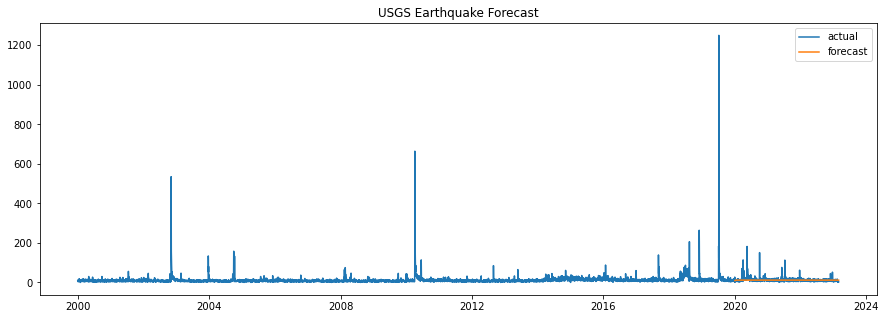

ARIMA(2, 0, 2) ,  RMSE=11.884


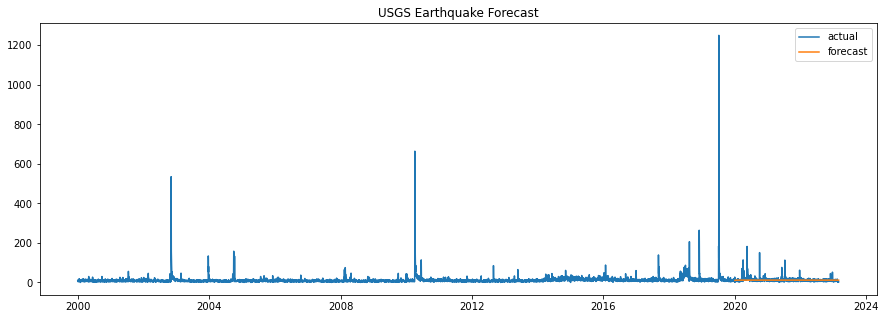

ARIMA(2, 1, 0) ,  RMSE=12.408


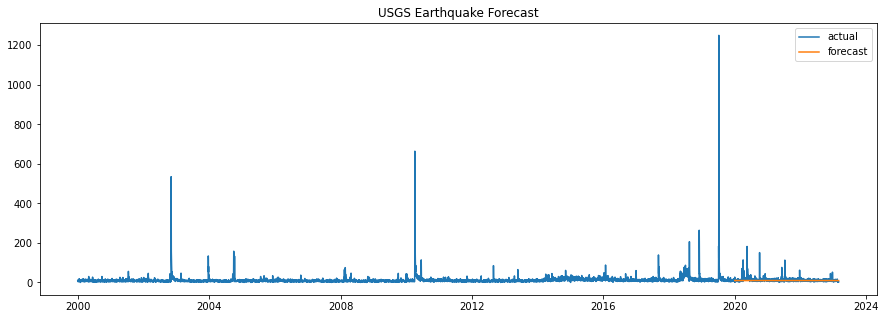

ARIMA(2, 1, 1) ,  RMSE=11.757


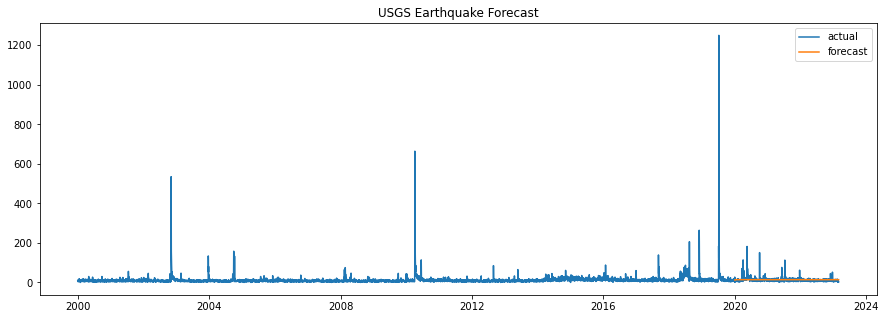

ARIMA(2, 1, 2) ,  RMSE=12.457


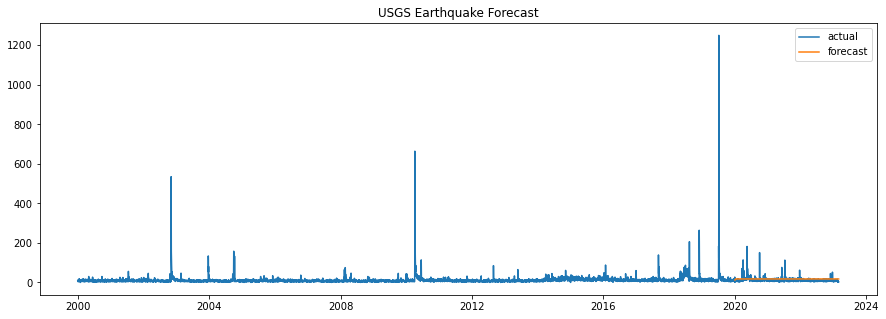

ARIMA(2, 2, 0) ,  RMSE=2732.268


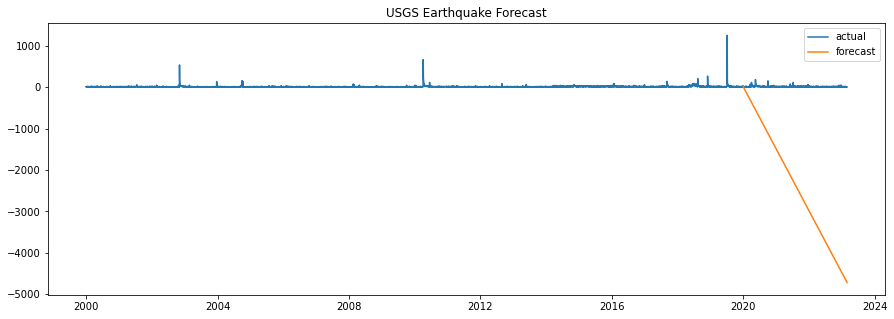

ARIMA(2, 2, 1) ,  RMSE=12.392


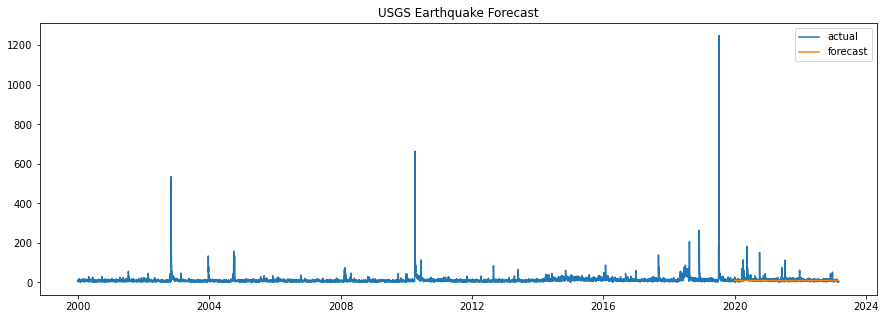

ARIMA(2, 2, 2) ,  RMSE=17.515


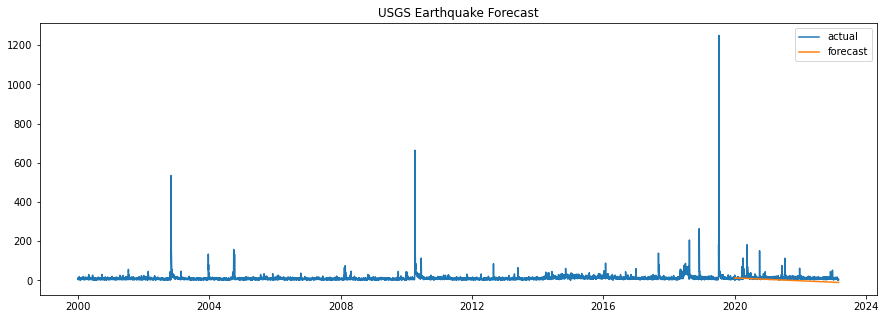

In [111]:
p_values = [0, 1, 2]
d_values = range(0, 3)
q_values = range(0, 3)
scores = []

start_date = '2020-01-01'
end_date = '2023-02-27'
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            model = ARIMA(train, order=order).fit()
            predictions = model.predict(start=start_date, end=end_date, typ='levels')
            error = sqrt(mean_squared_error(test['Count'], predictions))
            print('ARIMA%s ,  RMSE=%.3f' % (order,error))
            scores.append((order, error))

            plt.figure(figsize=(15, 5))
            plt.plot(df_time, label='actual')
            plt.plot(predictions, label='forecast')
            plt.title('USGS Earthquake Forecast')
            plt.legend()
            plt.show()
            
# remove empty results
scores = [r for r in scores if r[1] != None]
# sort configs by error, asc
scores.sort(key=lambda tup: tup[1])

In [112]:
scores

[((2, 1, 1), 11.75729987165699),
 ((2, 0, 0), 11.883023933150302),
 ((0, 0, 2), 11.883193581074666),
 ((1, 0, 1), 11.883299321521589),
 ((1, 0, 2), 11.883303633815169),
 ((2, 0, 1), 11.883366668682616),
 ((0, 0, 0), 11.883722064327321),
 ((2, 0, 2), 11.88382612520068),
 ((1, 0, 0), 11.88397178423163),
 ((0, 0, 1), 11.88486398025296),
 ((1, 1, 1), 12.0676806659545),
 ((0, 1, 2), 12.134800203135509),
 ((0, 2, 2), 12.14495719874373),
 ((0, 1, 1), 12.161261454086318),
 ((2, 2, 1), 12.391919319193587),
 ((2, 1, 0), 12.408138795437493),
 ((2, 1, 2), 12.456738452104913),
 ((1, 1, 2), 12.476286372645486),
 ((1, 2, 1), 12.772919599327292),
 ((1, 1, 0), 12.779606901366364),
 ((1, 2, 2), 12.97698812803196),
 ((0, 1, 0), 17.147817946081606),
 ((2, 2, 2), 17.515039667079538),
 ((0, 2, 1), 17.888474979180298),
 ((2, 2, 0), 2732.267808313636),
 ((1, 2, 0), 6115.450938144342),
 ((0, 2, 0), 17343.762237179162)]

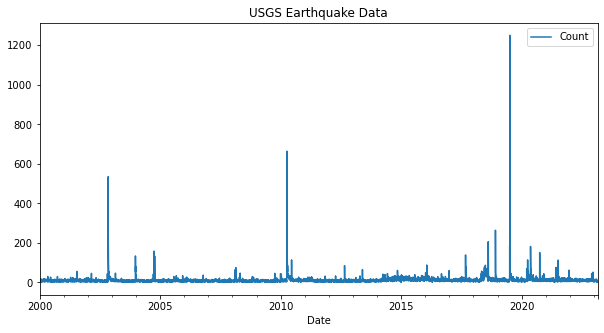

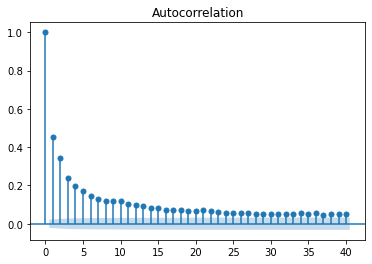

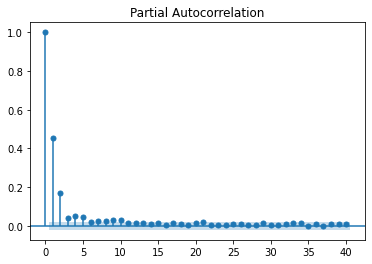

In [69]:
# visualize data
df_time.plot(figsize=(10, 5))
plt.title('USGS Earthquake Data')
plt.show()

# # select ARIMA model order
# plot_acf(df_time)
# plot_pacf(df_time)
# plt.show()


# # Test for stationarity using the ADF test
result = adfuller(df_time)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

# Plot the ACF and PACF to choose the ARIMA parameters
plot_acf(df_time['Count'], lags=50)
plot_pacf(df_time['Count'], lags=50)
plt.show()

# # Difference the time series to make it stationary
diff = df_time['Count'].diff().dropna()

# Plot the differenced time series
plt.plot(diff)
plt.xlabel('Time')
plt.ylabel('Count Difference')
plt.show()

# Test for stationarity again using the ADF test
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
#print('p-value: %

In [70]:
test.index.min(), test.index.max()

(Timestamp('2020-01-01 00:00:00', freq='D'),
 Timestamp('2023-02-27 00:00:00', freq='D'))

2020-01-01     7.120005
2020-01-02     9.387377
2020-01-03    10.227405
2020-01-04    10.538624
2020-01-05    10.653925
                ...    
2023-02-23    10.721784
2023-02-24    10.721784
2023-02-25    10.721784
2023-02-26    10.721784
2023-02-27    10.721784
Freq: D, Name: predicted_mean, Length: 1154, dtype: float64


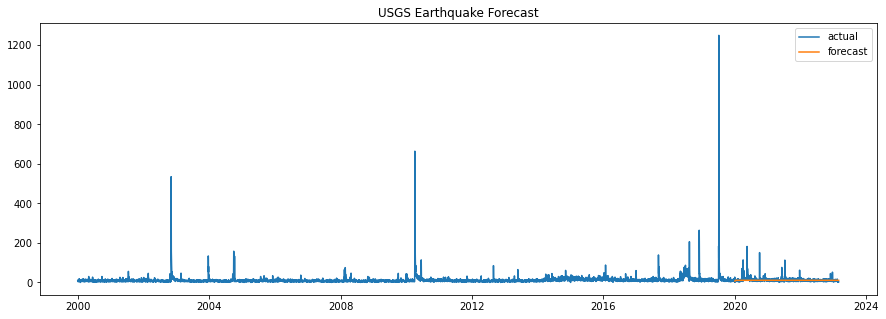

In [71]:

# fit ARIMA model
model = ARIMA(train, order=(1, 1, 1))
model_fit =  model.fit()

start_date = '2020-01-01'
end_date = '2023-02-27'
forecast = model_fit.predict(start=start_date, end=end_date, typ='levels')
print(forecast)
# visualize forecast
plt.figure(figsize=(15, 5))
plt.plot(df_time, label='actual')
plt.plot(forecast, label='forecast')
plt.title('USGS Earthquake Forecast')
plt.legend()
plt.show()

In [72]:
forecast = pd.DataFrame(forecast)
forecast.reset_index(inplace=True)
forecast = forecast.rename(columns={'index':'Date', 'predicted_mean':'predictions'})
forecast.head()

,Date,predictions
0,2020-01-01,7.120005
1,2020-01-02,9.387377
2,2020-01-03,10.227405
3,2020-01-04,10.538624
4,2020-01-05,10.653925


In [73]:
test1 = test.reset_index()

In [74]:
final = pd.merge(test1, forecast, on='Date')
final

,Date,Count,predictions
0,2020-01-01,12,7.120005
1,2020-01-02,7,9.387377
2,2020-01-03,11,10.227405
3,2020-01-04,6,10.538624
4,2020-01-05,12,10.653925
...,...,...,...
1149,2023-02-23,1,10.721784
1150,2023-02-24,2,10.721784
1151,2023-02-25,1,10.721784
1152,2023-02-26,1,10.721784


In [75]:
print('RMSE :', sqrt(mean_squared_error(final['Count'], final['predictions'])))

RMSE : 12.0676806659545


In [76]:
final.to_csv('predictions.csv', index = False)

## Exponential smoothing

In [77]:
print(test.index)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21',
               '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-25',
               '2023-02-26', '2023-02-27'],
              dtype='datetime64[ns]', name='Date', length=1154, freq='D')


 > Model params : ['add', 'add', 30, True] , RMSE : 13.43272


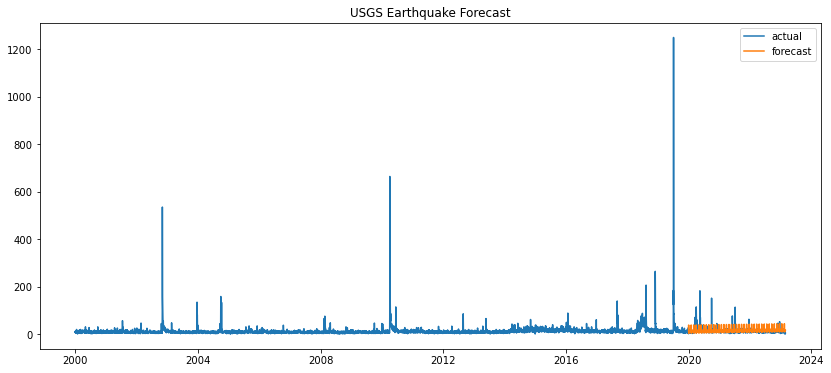

 > Model params : ['add', 'add', 30, False] , RMSE : 13.43201


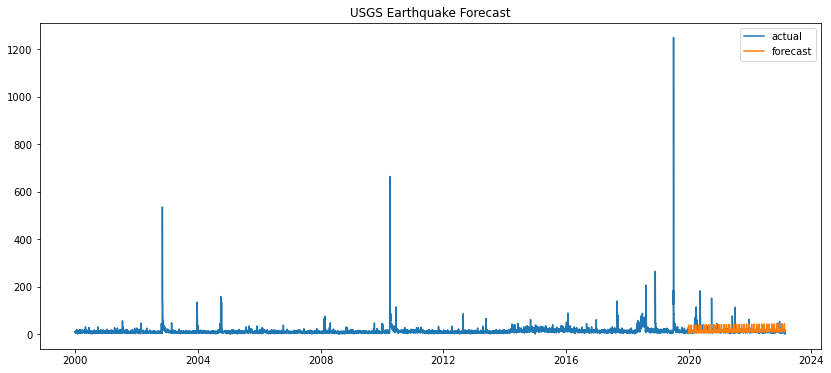

 > Model params : ['add', 'add', 60, True] , RMSE : 13.37217


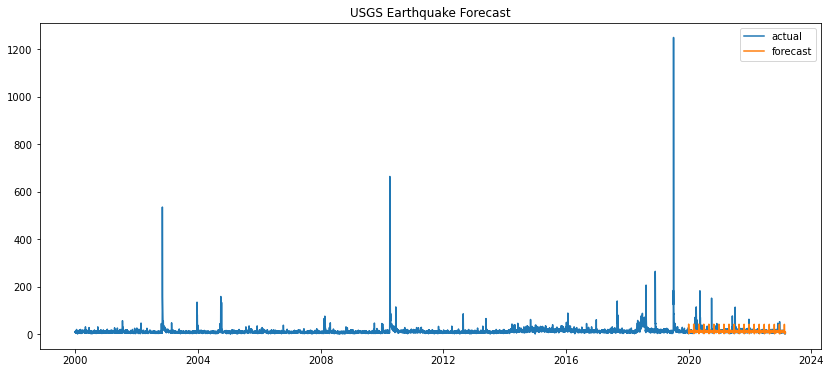

 > Model params : ['add', 'add', 60, False] , RMSE : 13.37173


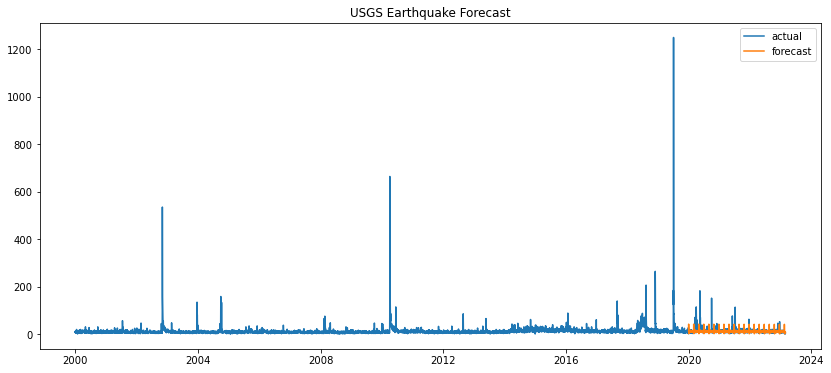

 > Model params : ['add', 'add', 180, True] , RMSE : 19.62049


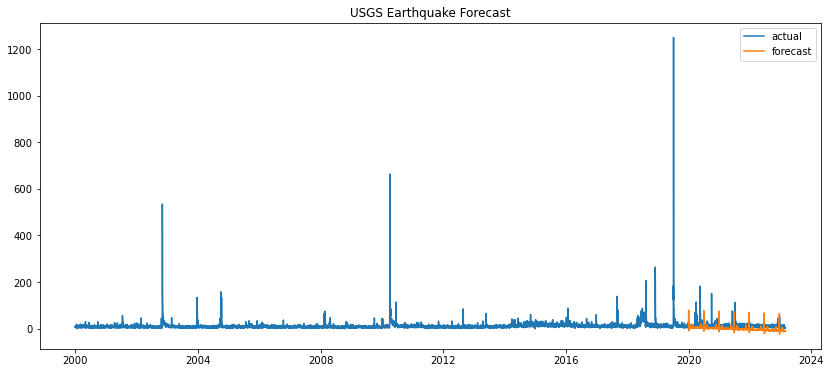

 > Model params : ['add', 'add', 180, False] , RMSE : 19.62116


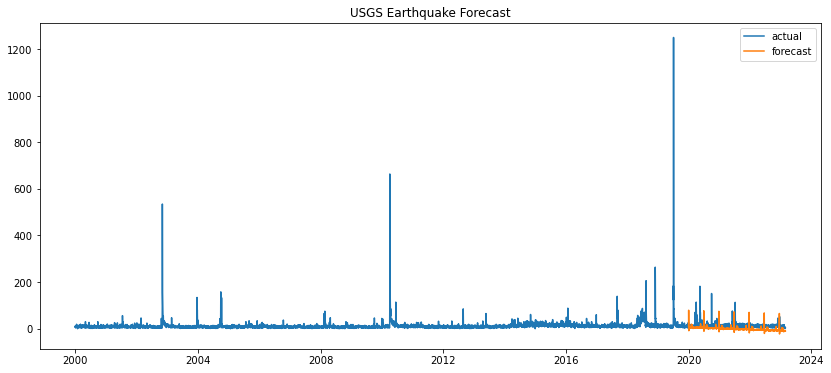

 > Model params : ['add', 'add', 365, True] , RMSE : 42.82408


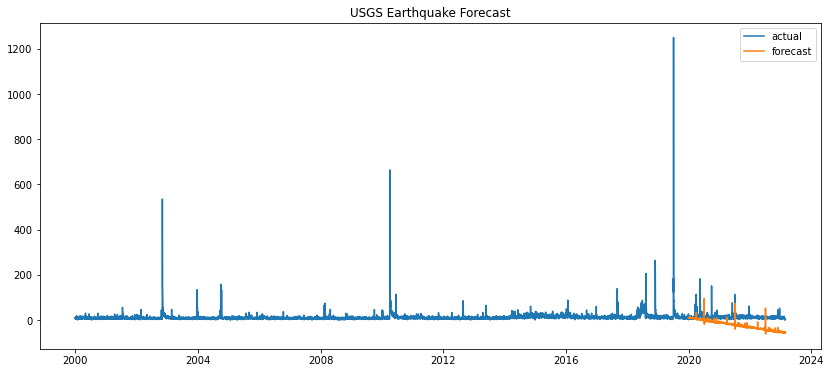

 > Model params : ['add', 'add', 365, False] , RMSE : 42.82809


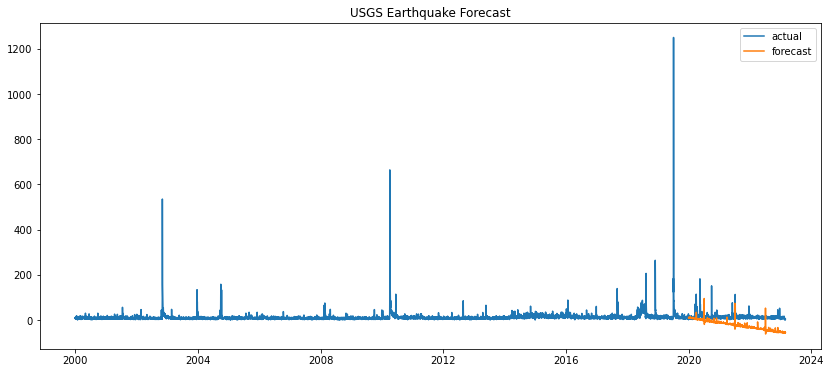

 > Model params : ['add', None, 30, True] , RMSE : 38.33356


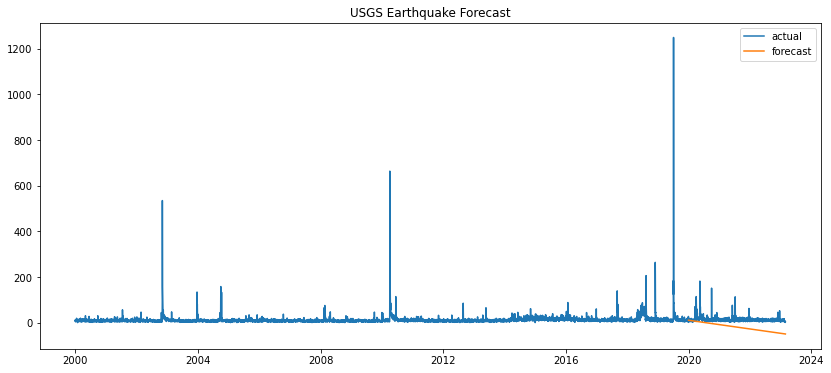

 > Model params : ['add', None, 30, False] , RMSE : 38.34498


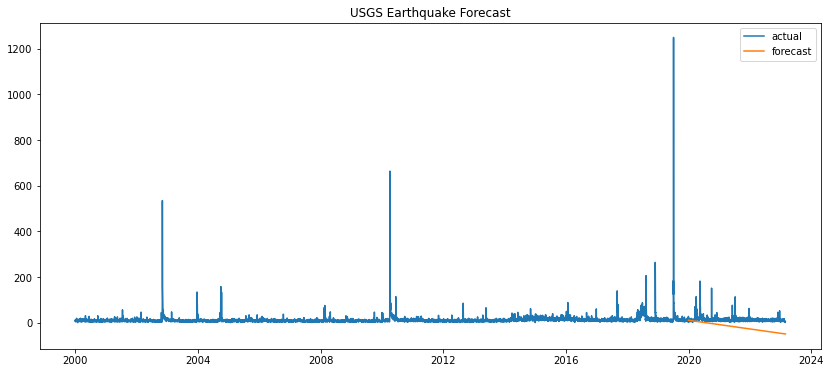

 > Model params : ['add', None, 60, True] , RMSE : 38.33356


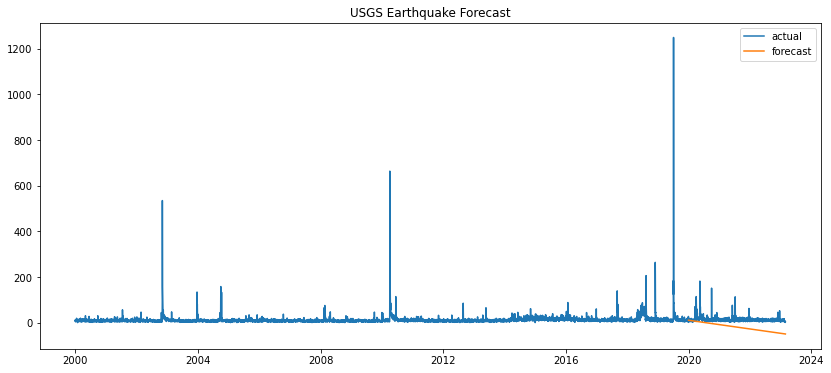

 > Model params : ['add', None, 60, False] , RMSE : 38.34498


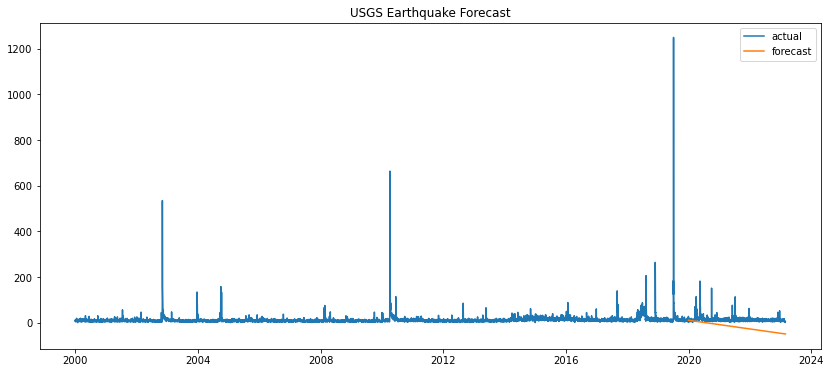

 > Model params : ['add', None, 180, True] , RMSE : 38.33356


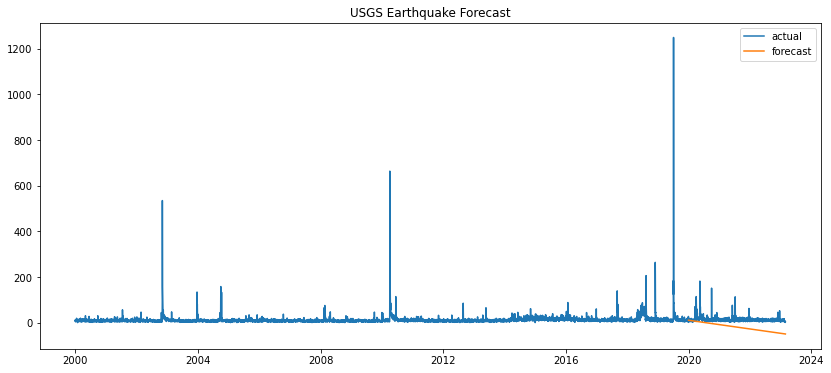

 > Model params : ['add', None, 180, False] , RMSE : 38.34498


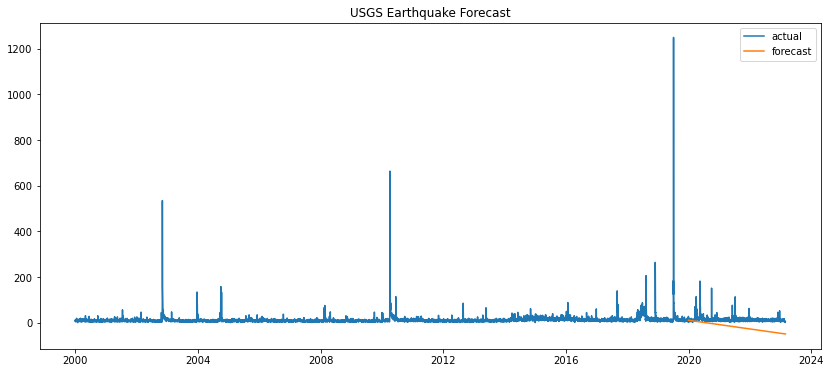

 > Model params : ['add', None, 365, True] , RMSE : 38.33356


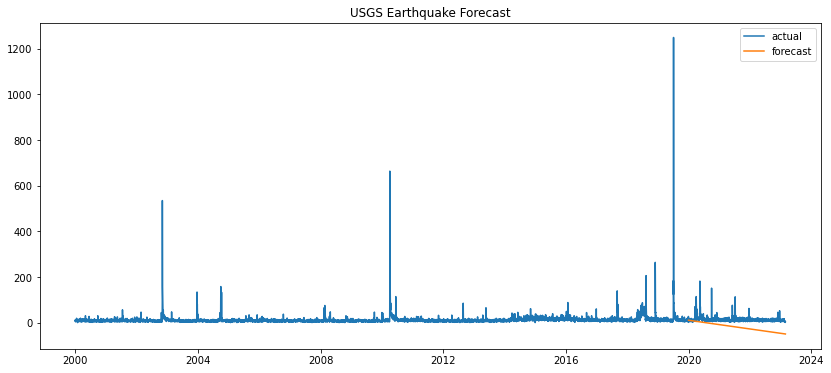

 > Model params : ['add', None, 365, False] , RMSE : 38.34498


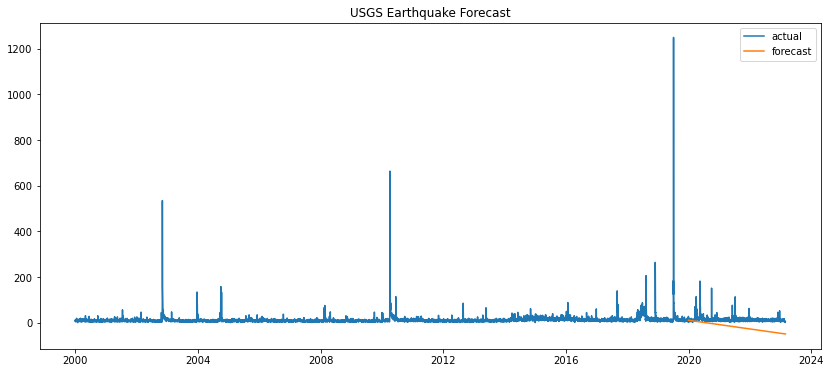

 > Model params : [None, 'add', 30, True] , RMSE : 13.10435


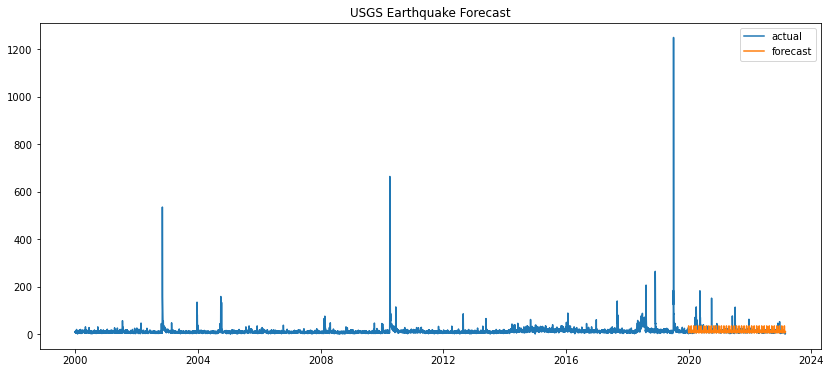

 > Model params : [None, 'add', 30, False] , RMSE : 13.10449


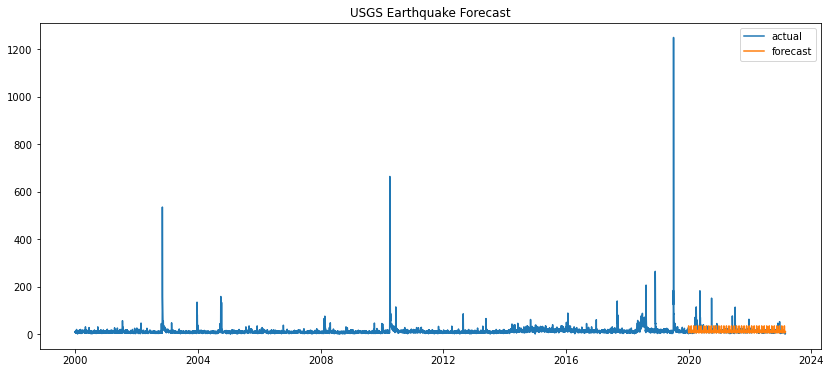

 > Model params : [None, 'add', 60, True] , RMSE : 13.23410


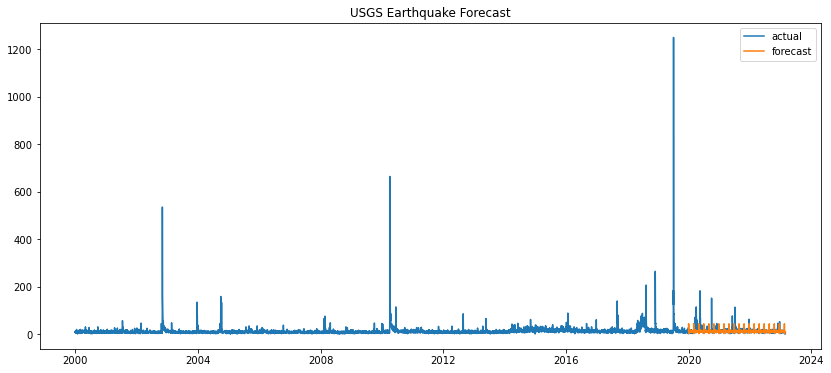

 > Model params : [None, 'add', 60, False] , RMSE : 13.23420


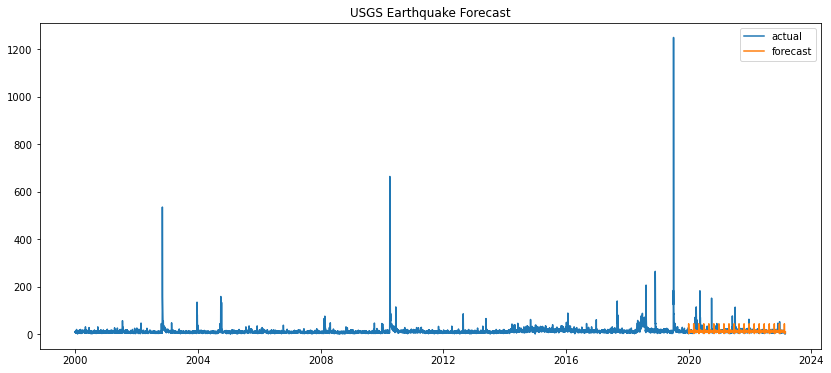

 > Model params : [None, 'add', 180, True] , RMSE : 14.63084


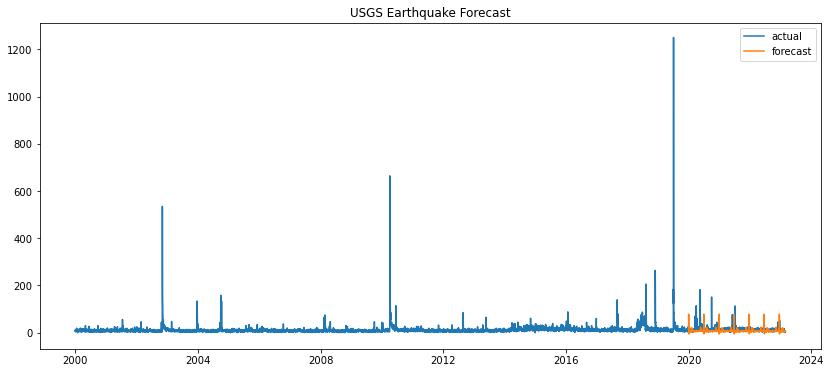

 > Model params : [None, 'add', 180, False] , RMSE : 14.63047


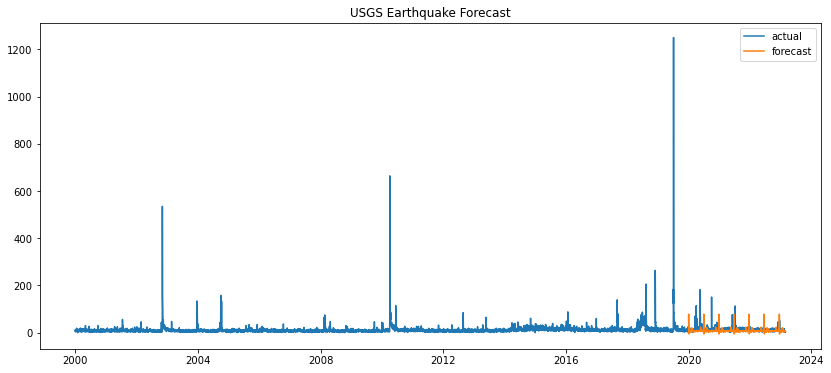

 > Model params : [None, 'add', 365, True] , RMSE : 13.21652


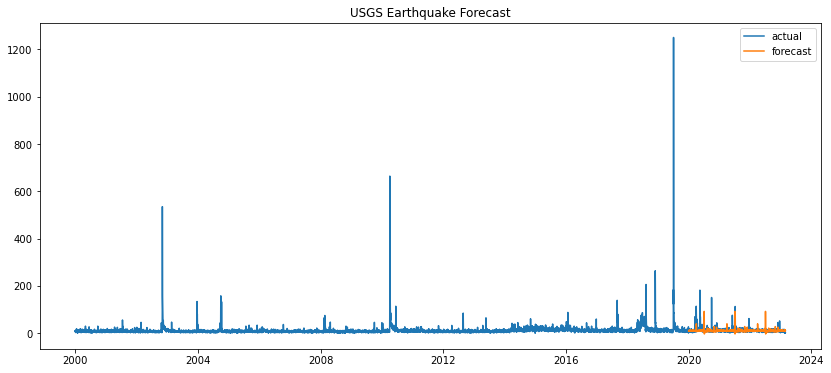

 > Model params : [None, 'add', 365, False] , RMSE : 13.21672


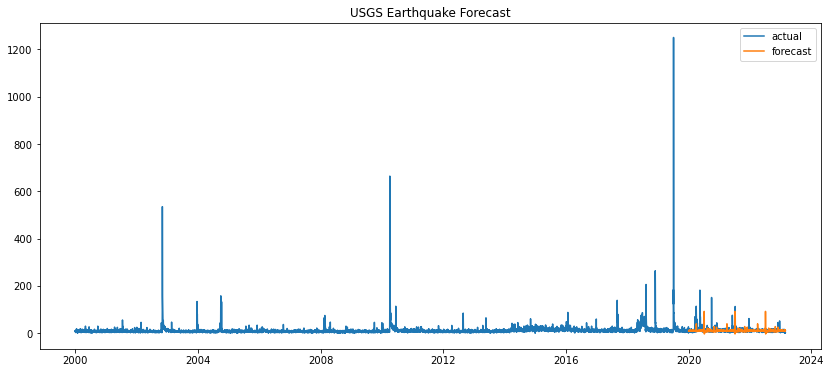

 > Model params : [None, None, 30, True] , RMSE : 12.16082


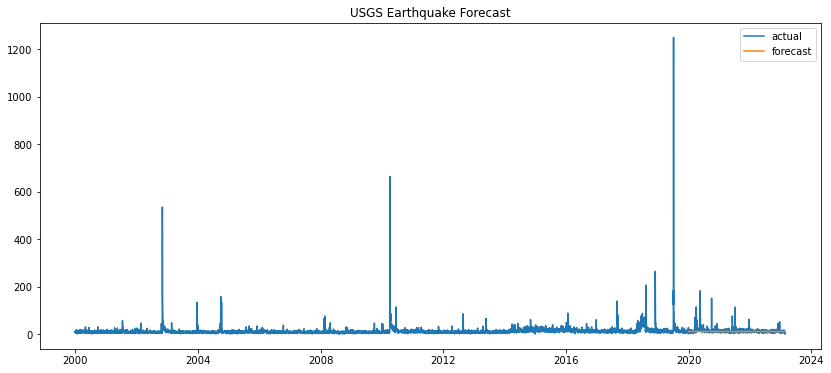

 > Model params : [None, None, 30, False] , RMSE : 12.16107


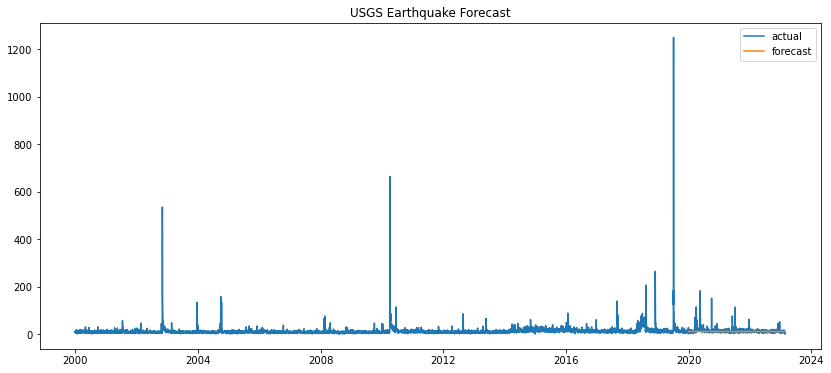

 > Model params : [None, None, 60, True] , RMSE : 12.16082


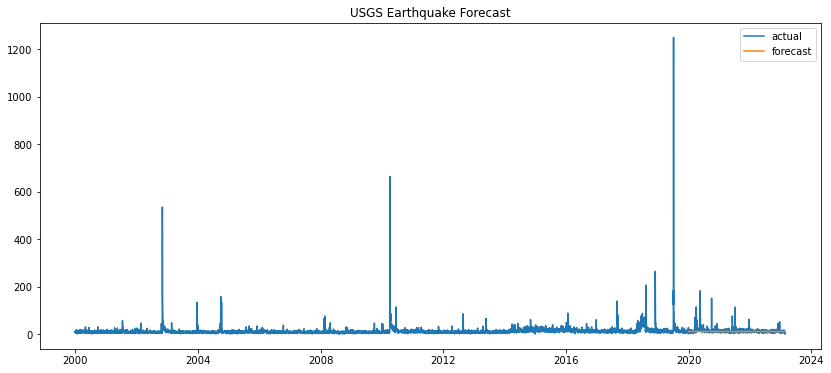

 > Model params : [None, None, 60, False] , RMSE : 12.16107


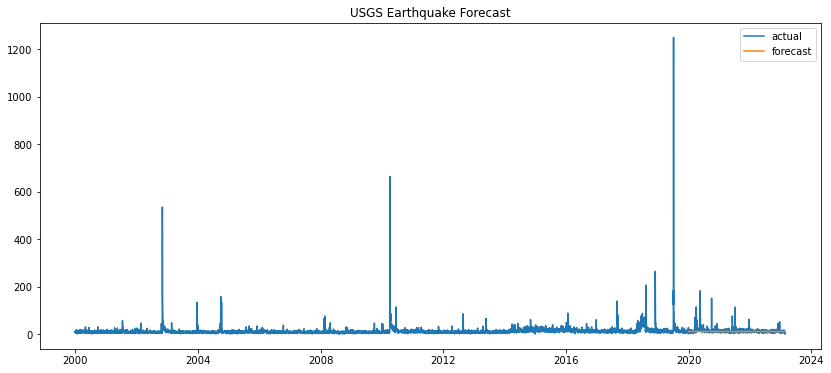

 > Model params : [None, None, 180, True] , RMSE : 12.16082


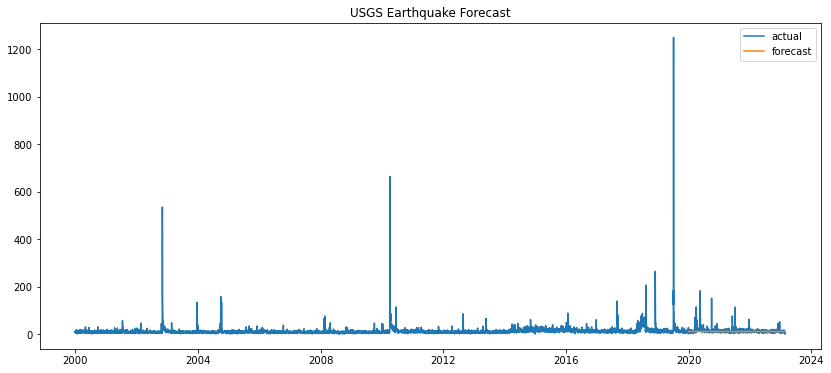

 > Model params : [None, None, 180, False] , RMSE : 12.16107


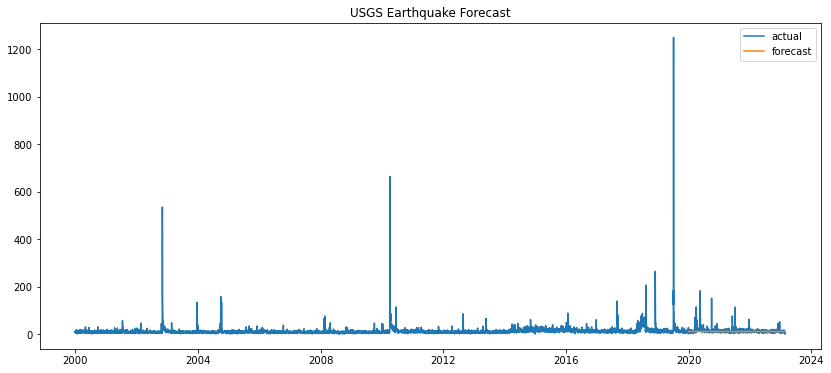

 > Model params : [None, None, 365, True] , RMSE : 12.16082


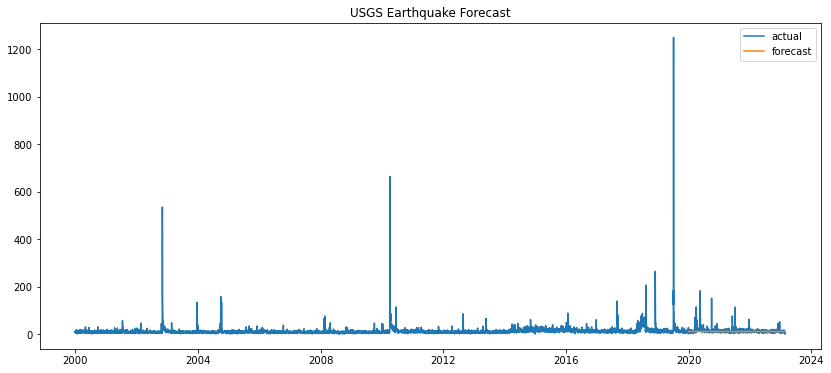

 > Model params : [None, None, 365, False] , RMSE : 12.16107


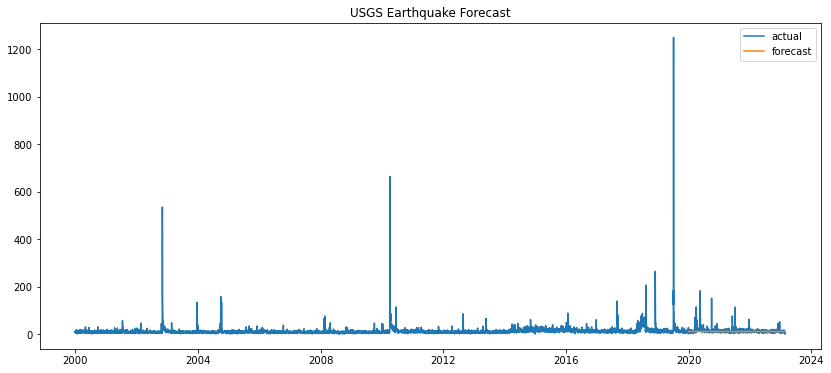

In [90]:
start_date = '2020-01-01'
end_date = '2023-02-27'
training = df_time[df_time.index < '2020-01-01']
testing = df_time[df_time.index >= '2020-01-01']

def vis(forecast):
    # visualize forecast
    plt.figure(figsize=(14, 6))
    plt.plot(df_time, label='actual')
    plt.plot(forecast, label='forecast')
    plt.title('USGS Earthquake Forecast')
    plt.legend()
    plt.show()

def exp_smoothing_configs(seasonal=[None]):
    models = list()
    # define config lists
    t_params = ['add', None]
    s_params = ['add', None]
    p_params = seasonal
    r_params = [True, False]
    # create config instances
    for t in t_params:
        for s in s_params:
            for p in p_params:
                for r in r_params:
                    cfg = [t,s,p,r]
                    models.append(cfg)
    return models

def exp_smoothing_forecast(training, config, testing):
    t,s,p,r = config
    model = ExponentialSmoothing(training, trend=t, seasonal=s, seasonal_periods=p)
    # fit model
    model_fit = model.fit(optimized=True, remove_bias=r)
    # make one step forecast
    
    yhat = model_fit.predict(start=testing.index.min(), end=testing.index.max())
    return yhat

def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

# walk-forward validation for univariate data
def walk_forward_validation(training, cfg, testing):
    predictions = exp_smoothing_forecast(training, cfg, testing)
    # estimate prediction error
    error = measure_rmse(testing['Count'], predictions)
    return error, predictions

def score_model(training, cfg, testing):
    result = None
    # convert config to a key
    key = str(cfg)
    result, predictions = walk_forward_validation(training, cfg, testing)
    if result is not None:
        print(' > Model params : %s , RMSE : %.5f' % (key, result))
        vis(predictions)
    return (key, result)

 

cfg_list = exp_smoothing_configs(seasonal=[30, 60, 180,365])
scores = [score_model(training, cfg, testing) for cfg in cfg_list]

# remove empty results
scores = [r for r in scores if r[1] != None]
# sort configs by error, asc
scores.sort(key=lambda tup: tup[1])

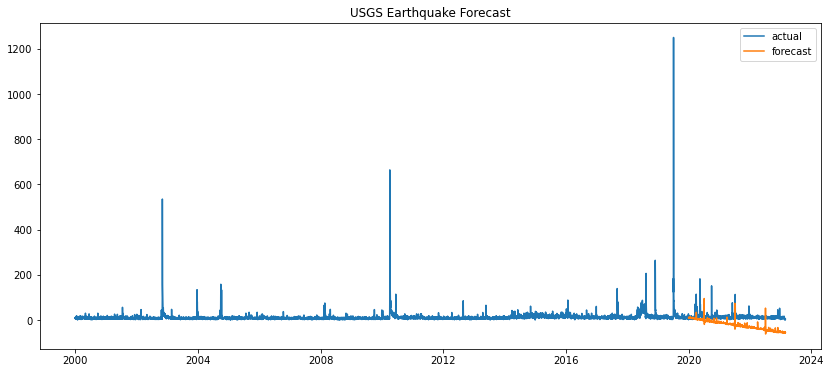

In [47]:
# fit exponential smoothing model
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=365)
model_fit = model.fit()

# make predictions
# start_date = '2023-04-01'
# end_date = '2028-12-31'

start_date = '2020-01-01'
end_date = '2023-02-27'
forecast = model_fit.predict(start=start_date, end=end_date)

# visualize forecast
plt.figure(figsize=(14, 6))
plt.plot(df_time, label='actual')
plt.plot(forecast, label='forecast')
plt.title('USGS Earthquake Forecast')
plt.legend()
plt.show()

In [51]:
model_fit.params['']

{'smoothing_level': 0.3421447670994833,
 'smoothing_trend': 0.009694155234231783,
 'smoothing_seasonal': 0.07373526851311457,
 'damping_trend': nan,
 'initial_level': 10.020128017126728,
 'initial_trend': -0.17051684441785453,
 'initial_seasons': array([-1.22847909e+00,  1.92909267e+00, -2.88725697e+00, -2.82731815e+00,
        -1.90117653e+00, -1.26369299e+00, -8.99354723e-01, -1.35117367e+00,
        -3.06194135e+00, -1.70770274e-01,  2.91728370e-01, -8.31510973e-01,
        -1.20577218e+00,  9.25499161e-02, -1.31848492e+00, -2.28121383e+00,
        -2.67123895e-01,  1.46706277e+00, -3.99206269e-01, -6.71672731e-01,
        -2.30481518e-01, -1.80214270e+00, -1.48506261e+00, -2.25495631e+00,
        -2.11659487e+00,  7.96867118e-03, -1.35115087e+00,  1.21609921e+00,
        -1.70664147e+00, -9.99452702e-01, -1.88609336e+00, -2.39967908e+00,
        -1.12327408e+00, -2.24919665e+00, -2.79748295e+00, -3.56084642e+00,
        -2.70712914e+00, -6.29295660e-01, -1.23330993e+00, -1.23221941

In [43]:
forecast = pd.DataFrame(forecast)
forecast.reset_index(inplace=True)
forecast = forecast.rename(columns={'index':'Date'})
test1 = test.reset_index()
final = pd.merge(test1, forecast, on='Date')
final = final.rename(columns={0:'predictions'})
final

,Date,Count,predictions
0,2020-01-01,12,9.682648
1,2020-01-02,7,10.941637
2,2020-01-03,11,10.465507
3,2020-01-04,6,7.948458
4,2020-01-05,12,9.629038
...,...,...,...
1149,2023-02-23,1,-57.281604
1150,2023-02-24,2,-57.786100
1151,2023-02-25,1,-55.812196
1152,2023-02-26,1,-57.081304


In [44]:
print('RMSE :', sqrt(mean_squared_error(final['Count'], final['predictions'])))

RMSE : 42.82808855001426


In [45]:
final.to_csv('Exponential_predictions.csv', index = False)

## LSTM

Epoch 1/20
101/101 - 37s - loss: 1.1715e-04 - 37s/epoch - 371ms/step
Epoch 2/20
101/101 - 34s - loss: 1.0973e-04 - 34s/epoch - 337ms/step
Epoch 3/20
101/101 - 34s - loss: 1.0297e-04 - 34s/epoch - 339ms/step
Epoch 4/20
101/101 - 31s - loss: 1.0052e-04 - 31s/epoch - 307ms/step
Epoch 5/20
101/101 - 32s - loss: 9.8287e-05 - 32s/epoch - 316ms/step
Epoch 6/20
101/101 - 32s - loss: 9.7388e-05 - 32s/epoch - 314ms/step
Epoch 7/20
101/101 - 34s - loss: 9.4680e-05 - 34s/epoch - 340ms/step
Epoch 8/20
101/101 - 34s - loss: 9.5159e-05 - 34s/epoch - 336ms/step
Epoch 9/20
101/101 - 34s - loss: 9.5146e-05 - 34s/epoch - 335ms/step
Epoch 10/20
101/101 - 33s - loss: 9.4218e-05 - 33s/epoch - 329ms/step
Epoch 11/20
101/101 - 33s - loss: 9.3564e-05 - 33s/epoch - 330ms/step
Epoch 12/20
101/101 - 30s - loss: 9.2903e-05 - 30s/epoch - 297ms/step
Epoch 13/20
101/101 - 31s - loss: 9.3677e-05 - 31s/epoch - 308ms/step
Epoch 14/20
101/101 - 27s - loss: 9.4401e-05 - 27s/epoch - 269ms/step
Epoch 15/20
101/101 - 22s - l

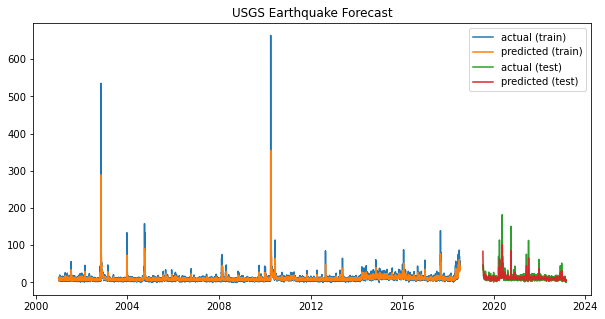

In [127]:
# normalize data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_time)

# split data into train and test sets
train_size = int(len(df_scaled) * 0.8)
train, test = df_scaled[:train_size], df_scaled[train_size:]

# create time series data for LSTM
def create_timeseries_data(data, lookback):
    X, y = [], []
    for i in range(len(data)-lookback-1):
        X.append(data[i:(i+lookback), 0])
        y.append(data[i+lookback, 0])
    return np.array(X), np.array(y)

lookback = 365
train_X, train_y = create_timeseries_data(train, lookback)
test_X, test_y = create_timeseries_data(test, lookback)

# reshape input data for LSTM
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

# define LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(lookback, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# fit LSTM model
model.fit(train_X, train_y, epochs=20, batch_size=64, verbose=2)

# make predictions
train_predict = model.predict(train_X)
test_predict = model.predict(test_X)

# invert scaling
train_predict = scaler.inverse_transform(train_predict)
train_y = scaler.inverse_transform([train_y])
test_predict = scaler.inverse_transform(test_predict)
test_y = scaler.inverse_transform([test_y])

# visualize forecast
plt.figure(figsize=(10, 5))
plt.plot(df_time.index[lookback+1:train_size], train_y.flatten(), label='actual (train)')
plt.plot(df_time.index[lookback+1:train_size], train_predict.flatten(), label='predicted (train)')
plt.plot(df_time.index[train_size+lookback+1:], test_y.flatten(), label='actual (test)')
plt.plot(df_time.index[train_size+lookback+1:], test_predict.flatten(), label='predicted (test)')
plt.title('USGS Earthquake Forecast')
plt.legend()
plt.show()

In [128]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                10400     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [129]:
len( test_y.flatten()), len(test_predict)

(1326, 1326)

In [131]:
print('RMSE :', sqrt(mean_squared_error( test_y.flatten(), test_predict)))

RMSE : 9.685840691398061
